## Foreign Direct Investment (FDI) Analysis: Unveiling Investment Trends Across Sectors (2000-2017)

This project delves into the intricate landscape of Foreign Direct Investment (FDI), providing a comprehensive analysis of investment patterns across various sectors over an 18-year period, from 2000 to 2017. By leveraging a rich dataset, the analysis aims to uncover key trends, identify sectors experiencing growth or decline, and provide valuable insights into the evolving investment dynamics.



In [1]:
# Import Required Libraries
# Libraries for data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Load the dataset from Google Drive
file_path = '/content/drive/My Drive/FDI_data.csv'  # Update the path if necessary
data = pd.read_csv(file_path)

In [ ]:
# Inspect the Dataset
# Basic inspection of the dataset
print("Dataset Overview:")
print(data.head())  # Display the first few rows
print(data.info())  # Display column details and data types
print(data.describe())  # Summary statistics

Dataset Overview:
                     Sector  2000-01  2001-02  2002-03  2003-04  2004-05  \
0  METALLURGICAL INDUSTRIES    22.69    14.14    36.61     8.11   200.38   
1                    MINING     1.32     6.52    10.06    23.48     9.92   
2                     POWER    89.42   757.44    59.11    27.09    43.37   
3   NON-CONVENTIONAL ENERGY     0.00     0.00     1.70     4.14     1.27   
4           COAL PRODUCTION     0.00     0.00     0.00     0.04     0.00   

   2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  2011-12  2012-13  \
0   149.13   169.94  1175.75   959.94   419.88  1098.14  1786.14  1466.23   
1     7.40     6.62   444.36    34.16   174.40    79.51   142.65    57.89   
2    72.69   157.15   988.68   907.66  1271.79  1271.77  1652.38   535.68   
3     1.35     2.44    58.82   125.88   622.52   214.40   452.17  1106.52   
4     9.14     1.30    14.08     0.22     0.00     0.00     0.00     0.00   

   2013-14  2014-15  2015-16  2016-17  
0   567.63   359.34   

In [5]:
# Data Cleaning
# Check for missing values

print("Missing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64


In [6]:
# Remove rows with missing values (if any)
fdi_data_cleaned = data.dropna()

In [7]:
# Check for duplicate rows and remove them
fdi_data_cleaned = fdi_data_cleaned.drop_duplicates()


In [8]:
# Verify cleaned data
print("Cleaned Dataset Information:")
print(fdi_data_cleaned.info())

Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB
None


In [9]:
# Exploratory Data Analysis (EDA)
# Year-wise FDI Analysis
# Calculate total FDI for each year
yearly_fdi = fdi_data_cleaned.iloc[:, 1:].sum(axis=0)

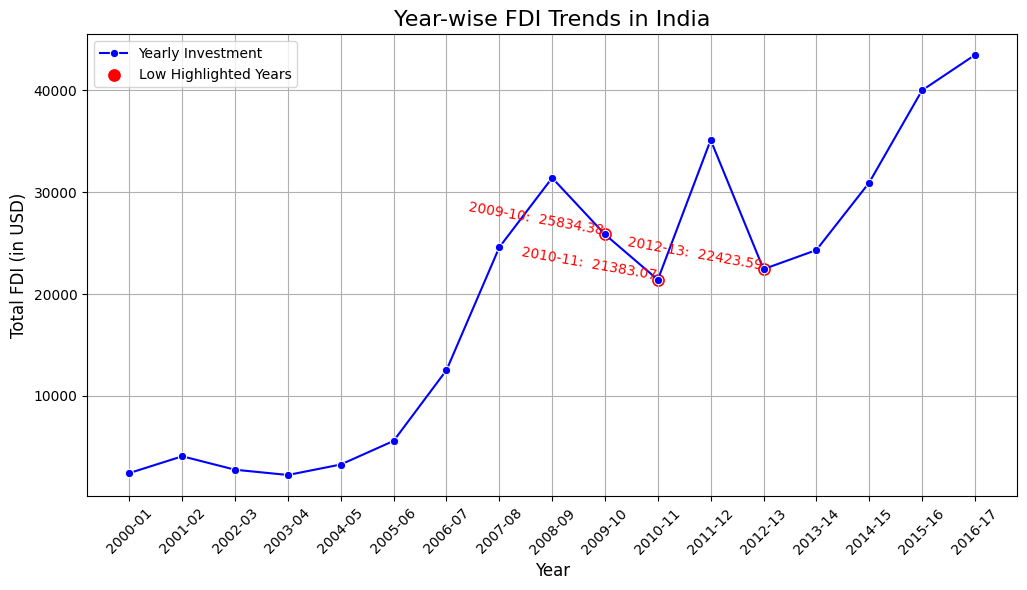

In [10]:
# Plot Year-wise FDI Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_fdi.index, y=yearly_fdi.values, marker='o', color='blue', label='Yearly Investment')

# Highlight specific years (2009-10, 2010-11, 2012-13)
highlight_years = ['2009-10', '2010-11', '2012-13']
highlight_values = yearly_fdi.loc[highlight_years]
sns.scatterplot(x=highlight_years, y=highlight_values, color='red', s=100, label='Low Highlighted Years')

# Add text annotation for highlighted years
for year in highlight_years:
    plt.text(year, yearly_fdi[year], f'{year}: {yearly_fdi[year]: .2f}',  ha='right', rotation= 350,fontsize=10, color='red')

plt.title('Year-wise FDI Trends in India', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total FDI (in USD)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Year-wise FDI Analysis: Key Findings (Focus on 2010-2011)

Significant Decline in 2010 and 2011:

The years 2010-11 and 2011-12 experienced a noticeable dip in FDI compared to surrounding years, highlighting a period of reduced investment.

Recovery Post-2011:

Following the dip in 2010-11 and 2011-12, there was a significant recovery and an upward trend in FDI, indicating renewed investor confidence.

Consistent Sectors Amid Decline:

Despite the overall dip, sectors like ‘COMPUTER SOFTWARE & HARDWARE’ and ‘TELECOMMUNICATIONS’ maintained relatively stable FDI, demonstrating their resilience.

In [11]:
# Extract FDI data for 2009-10 and 2010-11
data_2009_10 = data[['Sector', '2009-10']].sort_values(by='2009-10')
data_2010_11 = data[['Sector', '2010-11']].sort_values(by='2010-11')
# Find sectors with lowest and highest FDI for 2009-10
lowest_2009_10 = data_2009_10.iloc[0]
highest_2009_10 = data_2009_10.iloc[-1]
5
# Find sectors with lowest and highest FDI for 2010-11
lowest_2010_11 = data_2010_11.iloc[0]
highest_2010_11 = data_2010_11.iloc[-1]

In [12]:
# Print out the sectors with their FDI values
print("Sector with the lowest FDI in 2009-10:", lowest_2009_10['Sector'], "with␣FDI:", lowest_2009_10['2009-10'])
print("Sector with the highest FDI in 2009-10:", highest_2009_10['Sector'],"with FDI:", highest_2009_10['2009-10'])
print("Sector with the lowest FDI in 2010-11:", lowest_2010_11['Sector'], "with␣FDI:", lowest_2010_11['2010-11'])
print("Sector with the highest FDI in 2010-11:", highest_2010_11['Sector'],"with FDI:", highest_2010_11['2010-11'])


Sector with the lowest FDI in 2009-10: PHOTOGRAPHIC RAW FILM AND PAPER with␣FDI: 0.0
Sector with the highest FDI in 2009-10: CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects with FDI: 5466.13
Sector with the lowest FDI in 2010-11: MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS with␣FDI: 0.0
Sector with the highest FDI in 2010-11: SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other) with FDI: 3296.09


Sectoral FDI Highlights (2009-10 & 2010-11)

2009-10 FDI Highlights:

Lowest FDI: The sector ‘PHOTOGRAPHIC RAW FILM AND PAPER’ received the lowest FDI at 0.0 million USD.

Highest FDI: The ‘CONSTRUCTION DEVELOPMENT’ sector received the highest FDI at 5466.13 million USD.

2010-11 FDI Highlights:

Lowest FDI: The sector ‘MATHEMATICAL, SURVEYING AND DRAWING INSTRUMENTS’ received the lowest FDI at 0.0 million USD.

Highest FDI: The ‘SERVICES SECTOR’ (including finance, banking, insurance, and other sub-sectors) received the highest FDI at 3296.09 million USD.

Sectoral FDI Variability:

The FDI data for both years shows significant variability, with certain sectors receiving no investments while others, like ‘CONSTRUCTION DEVELOPMENT’ and ‘SERVICES SECTOR,’ attracted substantial foreign capital.

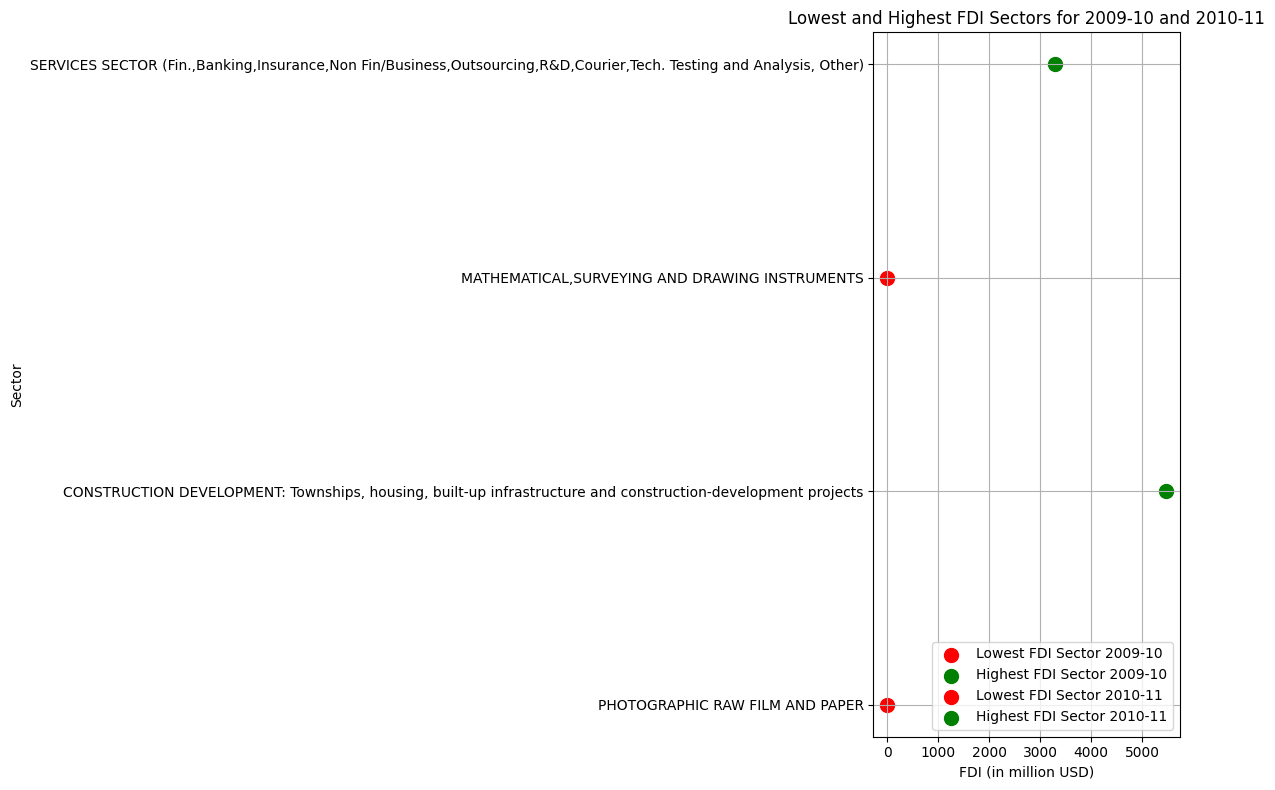

In [13]:
# Extract FDI data for the relevant years
data_years = ['2009-10', '2010-11']  # Adjust as needed for other years
sectors = data['Sector']
fdi_years = data[['Sector'] + data_years]

# Initialize a figure and axis for scatter plots
plt.figure(figsize=(12, 8))

# Iterate over each year to plot lowest and highest FDI sectors
for i, year in enumerate(data_years, 1):
    # Find sectors with lowest and highest FDI for the current year
    lowest_sector = fdi_years.sort_values(by=year).iloc[0]['Sector']
    highest_sector = fdi_years.sort_values(by=year).iloc[-1]['Sector']

    # Plot lowest FDI sector
    plt.scatter(fdi_years.loc[fdi_years['Sector'] == lowest_sector, year], lowest_sector,
                color='red', label=f'Lowest FDI Sector {year}', marker='o', s=100)
    # Plot highest FDI sector
    plt.scatter(fdi_years.loc[fdi_years['Sector'] == highest_sector, year], highest_sector,
                color='green', label=f'Highest FDI Sector {year}', marker='o', s=100)

# Add labels and title
plt.xlabel('FDI (in million USD)')
plt.ylabel('Sector')
plt.title('Lowest and Highest FDI Sectors for 2009-10 and 2010-11')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

scatter plots for FDI Variability: - The FDI data for both years shows significant variability,
with certain sectors receiving no investments while others, like ‘CONSTRUCTION DEVELOPMENT’ and ‘SERVICES SECTOR’, attracted substantial foreign capital.

Sector-wise Investment for top N sectors


In [15]:
# Sector-wise FDI Analysis
# Calculate total FDI for each sector
sector_fdi = fdi_data_cleaned.set_index('Sector').sum(axis=1)


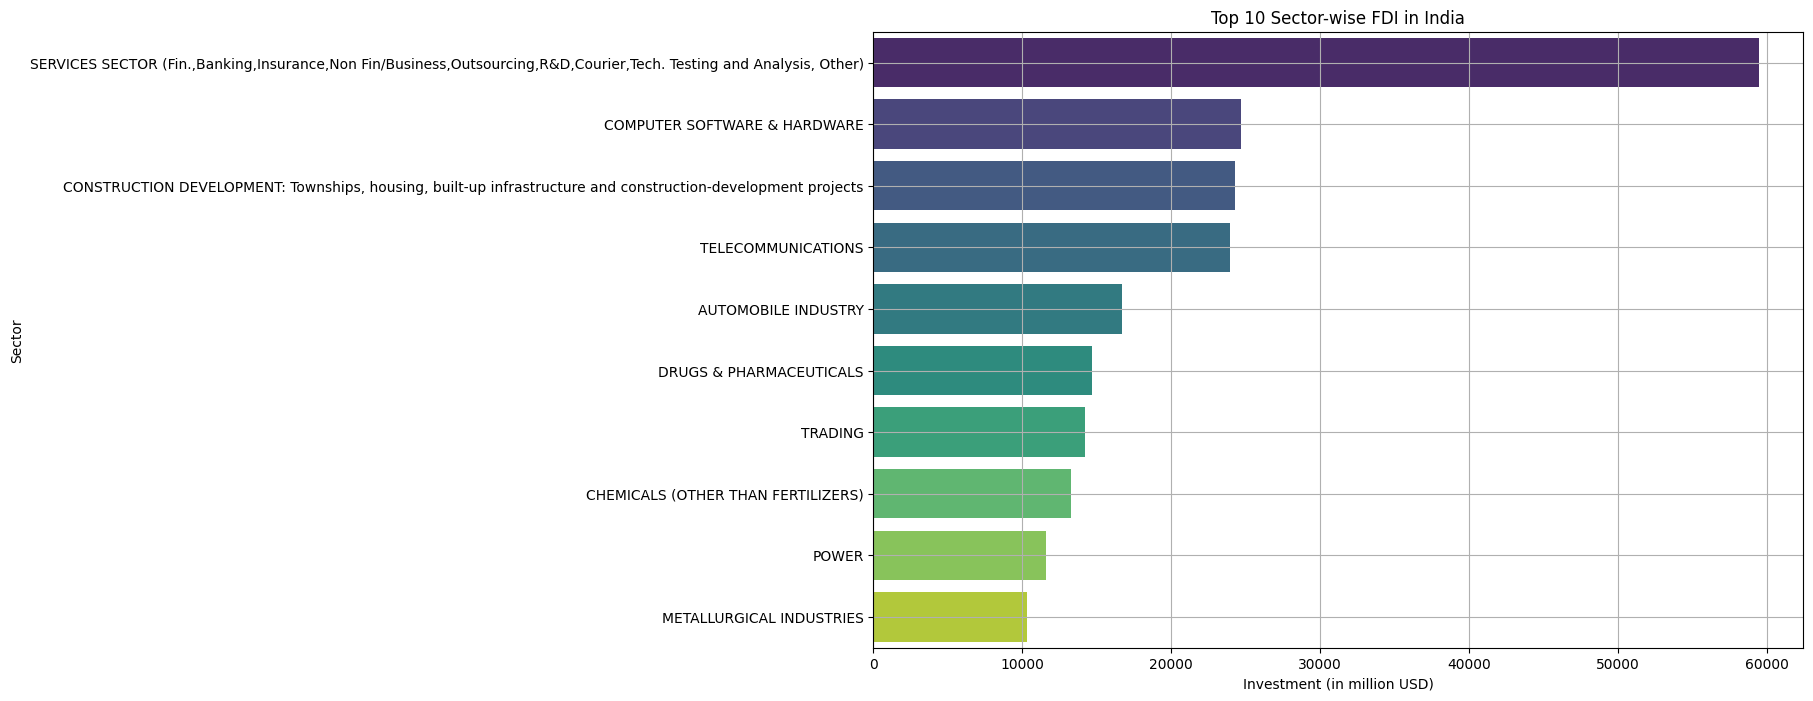

In [17]:
# Sort sectors by investment value
sector_investment_sorted = sector_fdi.sort_values(ascending=False)

# Select top N sectors to display
top_n = 10
top_sector_investment = sector_investment_sorted.head(top_n)

# Plotting Sector-wise Investment for top N sectors
plt.figure(figsize=(12, 8))
# sns.barplot(x=top_sector_investment.values, y=top_sector_investment.index, orient='h', palette='viridis')
sns.barplot(
    x=top_sector_investment.values,
    y=top_sector_investment.index,
    hue=top_sector_investment.index,
    orient='h',
    palette='viridis',
    legend=False  )
plt.title(f'Top {top_n} Sector-wise FDI in India')
plt.xlabel('Investment (in million USD)')
plt.ylabel('Sector')
plt.grid(True)
plt.show()


key Analysis for sector-wise FDI investment focusing on the top sectors:
1. Services Sector Dominance:
• The ‘SERVICES SECTOR’ (including finance, banking, insurance, non-financial business, outsourcing, R&D, courier, tech testing, and analysis) consistently attracted the
highest FDI inflows, highlighting its critical role in India’s economic landscape.
2. Tech and Telecom Growth:
• ‘COMPUTER SOFTWARE & HARDWARE’ and ‘TELECOMMUNICATIONS’ sectors
showed substantial and steady growth in FDI. These sectors benefited from India’s strong
IT infrastructure and growing digital economy.
3. Construction and Infrastructure Development:
• The ‘CONSTRUCTION DEVELOPMENT’ sector, which includes townships, housing,
built-up infrastructure, and development projects, consistently received high FDI, reflecting the ongoing urbanization and infrastructure expansion in India.
4. Manufacturing and Industrial Investment:
• The ‘AUTOMOBILE INDUSTRY’ and ‘METALLURGICAL INDUSTRIES’ were other
top sectors receiving significant FDI. This trend underscores India’s position as a manufacturing hub and its efforts to boost the industrial sector through policies like ‘Make
in India’.
5. Emerging Sectors:
• Emerging sectors like ‘PHARMACEUTICALS’ and ‘NON-CONVENTIONAL ENERGY’ (e.g., renewable energy) also saw increasing FDI inflows, indicating a diversification of investment into sustainable and high-growth potential areas driven by supportive
government policies and global trends towards sustainability.

In [18]:
# Step 6: Key Metrics
# Calculate basic statistics for FDI data
mean_fdi = fdi_data_cleaned.iloc[:, 1:].mean().mean()
median_fdi = fdi_data_cleaned.iloc[:, 1:].median().median()

print("Key Metrics:")
print(f"Mean FDI: {mean_fdi:.2f} Million")
print(f"Median FDI: {median_fdi:.2f} Million")


Key Metrics:
Mean FDI: 309.98 Million
Median FDI: 58.82 Million


Comparison Between Mean and Median - Discrepancy Between Mean and Median:

The substantial difference between the mean (309.98 million USD) and the median (58.82 million
USD) suggests that the FDI data is skewed, with a few sectors receiving very high investments
that raise the average significantly. Most sectors, however, receive much lower FDI, as reflected
by the median. - Implications for Policy and Investment: Policymakers and investors might
infer that while a few sectors are attracting significant foreign investments, many sectors still have
relatively low FDI inflows. This could highlight opportunities for targeted policies to encourage
more balanced FDI distribution across various sectors.

In [21]:
# Print the column names to verify
print(data.columns)

Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')


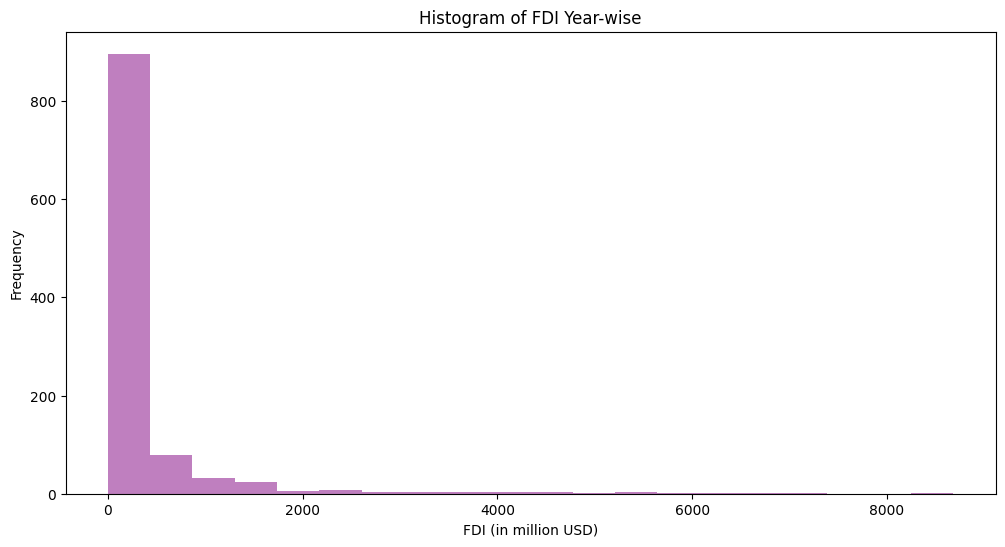

In [22]:
 # Transpose the data for year-wise analysis
year_data = data.set_index('Sector').T.reset_index().melt(id_vars='index', var_name='Sector', value_name='FDI')
year_data.columns = ['Year', 'Sector', 'FDI']
# 1. Histogram
plt.figure(figsize=(12, 6))
year_data['FDI'].plot(kind='hist', bins=20, alpha=0.5, color='purple')
plt.title('Histogram of FDI Year-wise')
plt.xlabel('FDI (in million USD)')
plt.ylabel('Frequency')
plt.show()

1. Distribution of FDI Values:
The histogram shows how FDI values are distributed across different sectors and years. The majority of FDI entries are concentrated at lower investment amounts, indicating that most sectors
received moderate levels of investment.
2. Concentration of Investments:
The histogram likely shows a concentration of FDI entries at lower investment values, suggesting
that many sectors received relatively small to moderate amounts of FDI. This is typical in many
datasets where a few sectors might receive very high investments while most receive moderate
amounts.
3. Detection of High FDI Values:
The right tail of the histogram might indicate sectors with exceptionally high FDI values. These
high values could be outliers or significant investments in key sectors, which could warrant further
investigation.
4. Frequency Distribution:
By observing the height of the bars in the histogram, one can understand the frequency of different FDI value ranges. Taller bars represent ranges with higher frequencies, indicating common
investment levels

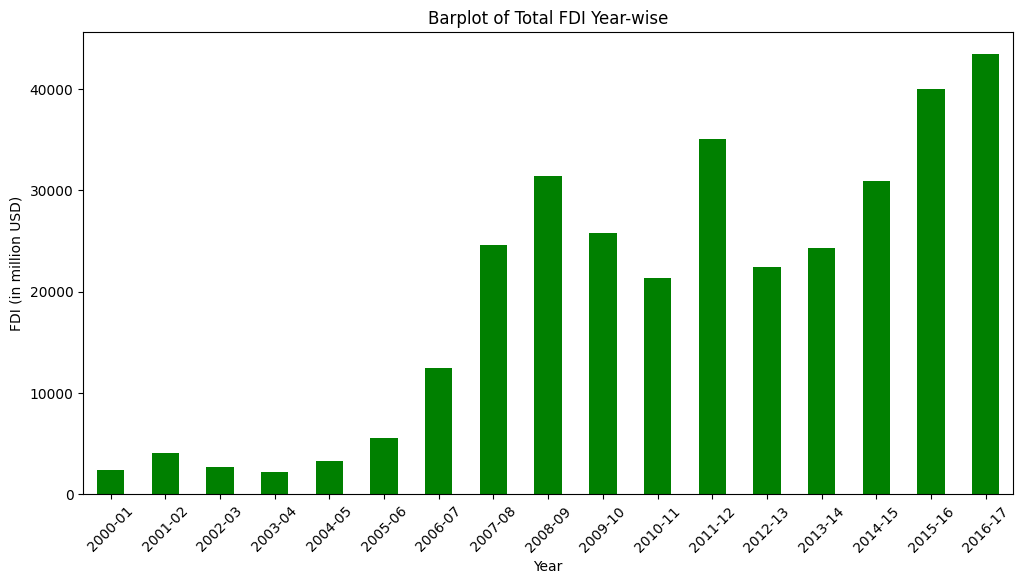

In [23]:
# Barplot
plt.figure(figsize=(12, 6))
year_data.groupby('Year')['FDI'].sum().plot(kind='bar',color='green')
plt.title('Barplot of Total FDI Year-wise')
plt.xlabel('Year')
plt.ylabel('FDI (in million USD)')
plt.xticks(rotation=45)
plt.show()

Comparative Analysis:-
By comparing the heights of the bars, one can quickly see which years were more successful in
attracting FDI. This comparative analysis helps in understanding the impact of different policies
or global economic conditions on FDI inflows.

Identifying Trends Over Time:-
The overall trend in the barplot can indicate whether FDI is generally increasing, decreasing, or
remaining stable over the period analyzed. This trend is crucial for long-term economic planning
and policy-making.
